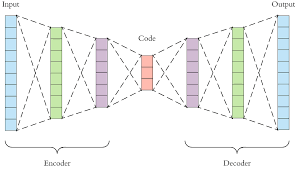

**上図がautoencoder model設計図**

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step


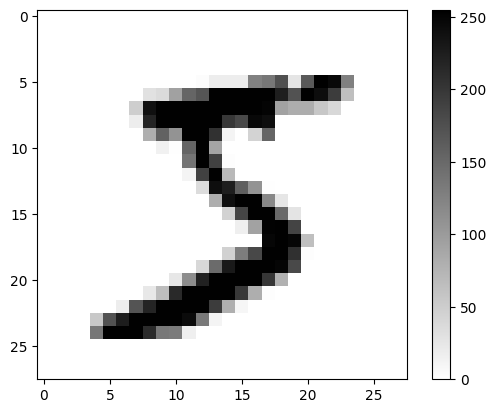

In [ ]:
# Loading the dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
#2タプルにて受け取れるデータ型らしいから(x_train, _), (x_test, _)みたいにしないとerror
#MNIST datasetは手書き文字のdataset
#The MNIST dataset consists of a large collection of handwritten digits (0-9), each represented as a 28x28 grayscale image.

#ちょっとvisualizeしてみる
img = x_train[0]

# Plot the image
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
469/469 [==============================] - 3s 4ms/step - loss: 0.2307 - val_loss: 0.1586
Epoch 2/2000
469/469 [==============================] - 3s 6ms/step - loss: 0.1413 - val_loss: 0.1261
Epoch 3/2000
469/469 [==============================] - 3s 7ms/step - loss: 0.1191 - val_loss: 0.1107
Epoch 4/2000


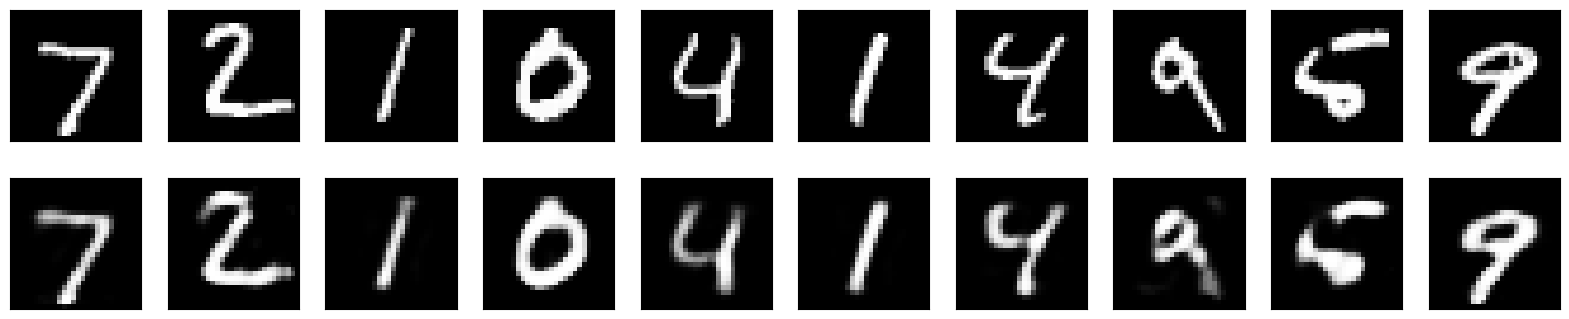

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
#MNIST datasetは手書き数字(0~9)のdataset
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model






#image処理の基礎として、grayscale imageが持つ0~255の固有pixel valueを0~1にscalingする #The value 0 represents black, the value 255 represents white
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#float32は整数ではなく小数点を扱うbitだから、0~255のrangeを0~1のrangeにして、float32にしておけば小数点たくさん現れても大丈夫





x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #要するに、x_train = x_train.reshape(60000, 784)
#input_img = Input(shape=(784,))の通り1Dだから、input layerが1D arrayを何個かをexpectしている
#だから、(何個(batch size), dimension/size)の2Dにreshapeする必要性
#ただ、x_train.shapeはこの時点にて、(60000, 28, 28)つまり、28*28 imageが60000個 #よって、x_train.shape[1:]は(28,28) (the first one除いた全てを選択)
#np.prod(28, 28)は、28*28の結果を出力する(784)
#これらより、x_train = x_train.reshape(60000, 784) #shapeが(60000, 28, 28)から(60000, 784)になった
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#上記と同様






input_img = Input(shape=(784,))
#input layerにおけるneuron数
encoded = Dense(32, activation='relu')(input_img)
#encoder layerにおけるhidden layerのneuron数
#今回は簡単な例だからhidden layerはひとつしかない設定
decoded = Dense(784, activation='sigmoid')(encoded)
#decoder layerにおけるhidden layerのneuron数







autoencoder = tf.keras.Model(input_img, decoded) #最終的にmodel設計はinput_imgから入って、decodedから出る
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary() #どんなmodelが最終的に完成した??
autoencoder.fit(x_train, x_train, epochs=2000, batch_size=128, shuffle=True, validation_data=(x_test, x_test)) #trainingします

decoded_imgs = autoencoder.predict(x_test)









###show the result###
#本来なら、最初よりclearになってるはずだけど、epoch数少ない+modelがsimpleだから微妙、9とかはnoise消えてる#

import matplotlib.pyplot as plt

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))  # assuming the images are 28x28 pixels
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # assuming the images are 28x28 pixels
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()